In [1]:
#Load Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

### 1.	Load the data (wine.xls) file 
a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/wine and read the description of the dataset and attach suitable headers.

In [23]:
df = pd.read_csv('wine.xls', names = ["Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Check data info and dimension
df.info()
#No missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#Check distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


### b)	Remove the first column (cultivator) and perform KMeans with (K=3) 

In [5]:
#Check cultivator variable distribution
df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [6]:
# Removing the first column cultivator
X=df.loc[:,'Alcohol':'Proline']

In [7]:
#Keep cultivator as seprate file
Y=df.loc[:,'Cultivator']

In [8]:
#Check the new data dimension
X.shape

(178, 13)

In [9]:
X.corr()
#Total_phenols needs to be watched. Add more insights

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


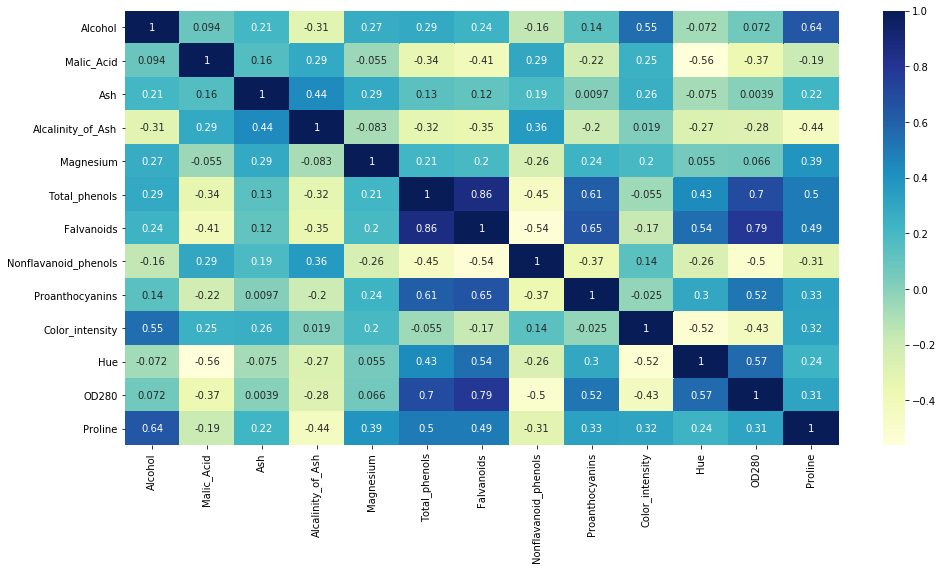

In [10]:
cor=X.corr()
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [11]:
###Scale the data points before doing K means( Required)
from scipy.stats import zscore
X_scaled = X.apply(zscore)

In [12]:
# check the data points
X_scaled.head(2)

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [13]:
#Buils required K Means cluster
kmeans = KMeans(n_clusters=3,random_state=101)

In [14]:
#Fit it on our data
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [15]:
# Check Centroid values for each cluster and store it in new data frame
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled))
centroid_df

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


* From the centroid values we can see that for the feature 'Alcohol' the clusters formed have distinct centroids. Which means that the clustering algorithm has performed well and identified 3 distinct clusters correctly. The same can be said for features 'Alcalinity_of_Ash','Magnesium','Total_phenols','Falvanoids', 'Nonflavanoid_phenols' ,'Proanthocyanins' , 'Color_intensity'

In [16]:
#create a new dataframe for labels and converting it
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster_number']))
df_labels['cluster_number'] = df_labels['cluster_number'].astype('category')

In [17]:
# Join the label dataframe with the raw data frame
X_cluster = X.join(df_labels)
X_cluster.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline,cluster_number
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [24]:
df_labels.cluster_number.value_counts()

0    65
2    62
1    51
Name: cluster_number, dtype: int64

# Agglomerative Clustering 

# Use Cophenet index to find best linkage method

* Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
* closer it is to 1, the better is the clustering,it represents the tightness of the clusters 

In [18]:
Z = linkage(X_scaled, method='complete')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.5916829459078577

In [19]:
Z = linkage(X_scaled, method='single')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.5436231199247621

In [20]:
Z1 = linkage(X_scaled, method='average')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.5436231199247621

In [21]:
Z = linkage(X_scaled, method='ward')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.6623487206613261

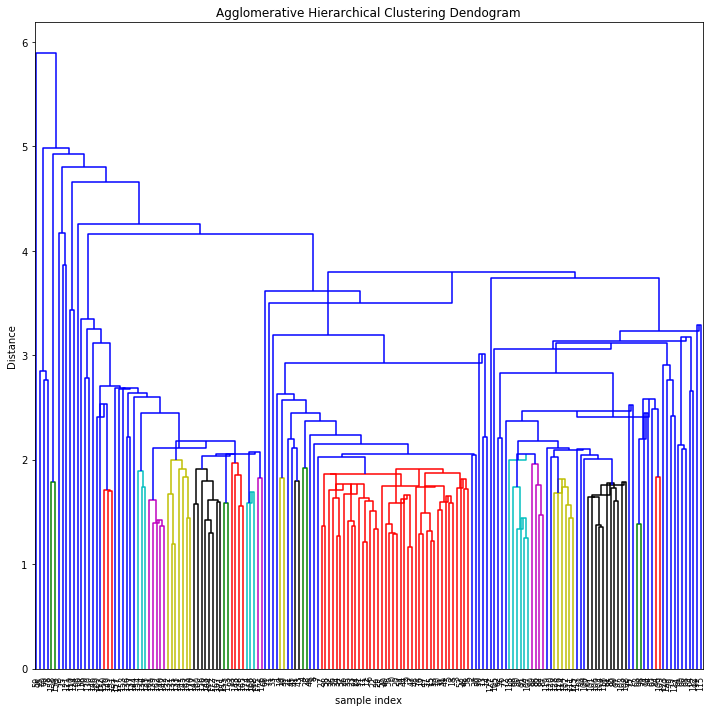

In [24]:
#Plot dendogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=2, leaf_font_size=8. )
plt.tight_layout()

In [27]:
#build the model using ward method
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [28]:
#Train it
model.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [29]:
X_scaled['cluster_labels'] = model.labels_
X_scaled['cluster_labels'].value_counts()

2    64
0    58
1    56
Name: cluster_labels, dtype: int64

Text(0.5, 0.92, '3D plot of Hierarchical Clustering')

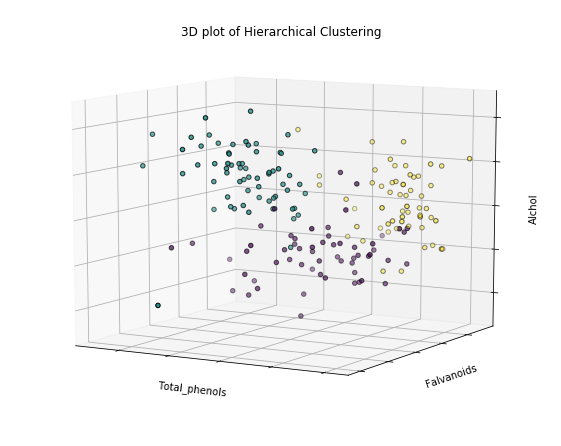

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=120) # elev and azim can change view 
model.fit(X_scaled)
labels = model.labels_
ax.scatter(X_scaled.iloc[:, 5], X_scaled.iloc[:, 6], X_scaled.iloc[:, 0],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total_phenols')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Alchol')
ax.set_title('3D plot of Hierarchical Clustering')

* Comment on the results obtained using KMeans and  Hierarchical Clustering, which clustering method best suited for this dataset.

* Based on the above results, we can say that K Means clustering is working better for this data set.Checking the clusters formed we can say that the clusters made by K means are more closer to the original labels. but, In general we know that agglomerative works well with less data compared to large dataset.So need to do few more things on data like outlier treatment, dropping of correlated variables and than re-run the above analysis.Here, KMeans clustering has divided into three clusters of size: 65, 51 and 62 while Agglomerative Clustering has divided into three clusters of size: 174, 1 and 3, which is not a good distribution.Results needs to be improved as suggested

* e)	Apply PCA technique on the 13 independent variables and reduce the dimensions to (top-7) PC dimensions based on Eigen Values and reduce the original dataset to 178 x 7 dimension and fit a Logistic Regression model for (70%) of records and validate on (30%) of the records with precision and recall values.

# PCA

In [32]:
# Standardize feature to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
X_std.shape

(178, 13)

In [33]:
# Obtain covariance matrix for X_std
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909

In [34]:
#Calculate eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13x13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135

In [35]:
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[4.732436977583594, 2.511080929645123, 1.4542418678464695, 0.924165866824875, 0.8580486765371109, 0.645282212467855, 0.5541414662457842, 0.3504662749462544, 0.2905120326939777, 0.25232001036082496, 0.2270642817308856, 0.1697237389801216, 0.10396199182075326]


In [36]:
#Cumulative Variance
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


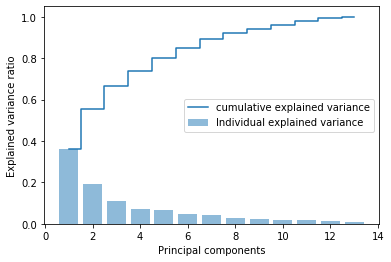

In [37]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained) 

plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [38]:
# Keep the first 7 principal components 
# P_reduce is 13 x 7 matrix
P_reduce = np.array(eigvectors_sort[0:7]).transpose()
# The projected data in 2D will be n x 7 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [39]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((178, 13), (13, 7), (178, 7))

In [40]:
from sklearn import model_selection

test_size = 0.30
seed = 11 
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, Y, test_size=test_size, random_state=seed)

In [41]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

0.9629629629629629


In [42]:
cm= metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[21  0  0]
 [ 1 20  1]
 [ 0  0 11]]


In [43]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.91      0.95        22
           3       0.92      1.00      0.96        11

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



# Compare the above (e) results with fitting a Logistic Regression model for the original dataset (178 x 13) without applying PCA.

In [44]:
from sklearn import model_selection

test_size = 0.30
seed = 77
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, Y, test_size=test_size, random_state=seed)

In [45]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

1.0


In [46]:
cm= metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[17  0  0]
 [ 0 19  0]
 [ 0  0 18]]


In [47]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        18

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# Comment on the effect of PCA with reference to Bias – Variance trade off, between the model (e) and (f)

Using PCA the biased error would reduce as in PCA if we use 7 PC Dimension ,each dimension has all 13 columns in different propositons in it,where as if we just get 7 most correlated columns with y to predict the model, We are actually doing Biasing and causes Biased error. To reduce variance error, we need to have atleast  196 samples to process for 14 attributes. This reason causes our Logistic Regression model(without PCA) to overfit, which causes high variance error.PCA helps in generalization i.e to prevent Overfitting and Underfitting.
* When we do PCA, due to dimension reduction the low contributing components are dropped. Hence we boost the Signal to Noise ratio.Also if we drop the features before performing PCA, the model will suffer from bias error. However that is not the case with PCA. PCA reduces the Bias Error since we are not dropping features from the main dataset, but dropping the components which have high noise and donot contribute much information to the model. This reduction in dimension also gives rise to Variance error in our model. But due to PCA we come to an aggreable balance between Bias and Variance Error.
* This way we achieve a balance between Bias and Variance error.